# Sentiment Analysis dari Instagram comments calon Presiden 2024 sebelum dan sesudah deklrasi calon wakil presiden menggunakan Naive Bayes


## Tujuan : mengetahui perbedaan sentiment dari komentar instagram sebelum dan sesudah deklarasi calon wakil presiden


<ul>
    <li>
    Aurelius Ivan Wijaya (00000054769)
    </li>
    <li>
    Rajendra Abhinaya (00000060445)
    </li>
    <li>
    Maecyntha Irelynn Tantra (00000055038)
    </li>
    <li>
    Patricia theodora (00000054093)
    </li>
<ul>

# Data Collection

Data yang digunakan adalah data komentar instagram dari 4 calon presiden 2024 yang didapatkan dari instagram detikcom

In [1]:
# Import Library
import pandas as pd
import numpy as np

In [2]:
# import dataset    
# [ Primary Dataset ]
ganjar_before = pd.DataFrame(pd.read_csv('./Dataset/Ganjar/ganjar_before.csv', on_bad_lines="skip")) # get only 100 data
ganjar_before = ganjar_before[:100]
ganjar_after = pd.DataFrame(pd.read_csv('./Dataset/Ganjar/ganjar_after.csv', on_bad_lines="skip"))
ganjar_after = ganjar_after[:100]
prabowo_before = pd.DataFrame(pd.read_csv('./Dataset/Prabowo/prabowo_before.csv', on_bad_lines="skip"))
prabowo_before = prabowo_before[:100]
prabowo_after = pd.DataFrame(pd.read_csv('./Dataset/Prabowo/prabowo_after.csv', on_bad_lines="skip"))
prabowo_after = prabowo_after[:100]
# prabowo_before = pd.DataFrame(pd.read_csv('./Dataset/Detik/detik_prabowo_before.csv', on_bad_lines="skip"))
# prabowo_after = pd.DataFrame(pd.read_csv('./Dataset/Detik/detik_prabowo_after.csv', on_bad_lines="skip"   ))
detik_anies_before = pd.DataFrame(pd.read_csv('./Dataset/Detik/detik_anies_before.csv', on_bad_lines='skip'))
detik_anies_after = pd.DataFrame(pd.read_csv('./Dataset/Detik/detik_anies_after.csv', on_bad_lines="skip"))
detik_ganjar_before = pd.DataFrame(pd.read_csv('./Dataset/Detik/detik_ganjar_before.csv', on_bad_lines="skip"))
detik_ganjar_after = pd.DataFrame(pd.read_csv('./Dataset/Detik/detik_ganjar_after.csv', on_bad_lines="skip"))
detik_prabowo_before = pd.DataFrame(pd.read_csv('./Dataset/Detik/detik_prabowo_before.csv', on_bad_lines="skip"))
detik_prabowo_after = pd.DataFrame(pd.read_csv('./Dataset/Detik/detik_prabowo_after.csv', on_bad_lines="skip"   ))
# [ Secondary Dataset ]
instagram_cyber_comments = pd.read_csv('./Dataset/dataset_komentar_instagram_cyberbullying.csv')
tweet_tv = pd.read_csv('./Dataset/dataset_tweet_sentimen_tayangan_tv.csv')
tweet_pilkada = pd.read_csv('./Dataset/dataset_tweet_sentiment_pilkada_DKI_2017.csv')
tweet_opini_film = pd.read_csv('./Dataset/dataset_tweet_sentiment_opini_film.csv')
tweet_cellular = pd.read_csv('./Dataset/dataset_tweet_sentiment_cellular_service_provider.csv')
prastyo_sentiment = pd.read_csv('./Dataset/prastyo-sentiment_all.csv')
sentiment_twitter_indonesia = pd.read_csv('./Dataset/Indonesian Sentiment Twitter Dataset Labeled.csv', sep='\t')
# sentiment_shopee = pd.read_csv('./Dataset/dataset_shopee2.csv', on_bad_lines="skip")
import chardet

# Detect encoding
with open('./Dataset/dataset_shopee2.csv', 'rb') as f:
    result = chardet.detect(f.read())
# Use the detected encoding when reading the CSV file
sentiment_shopee = pd.read_csv('./Dataset/dataset_shopee2.csv', on_bad_lines="skip", encoding=result['encoding'])

In [3]:
import pandas as pd

def balance_dataset(data, label_column, max_samples=None):

    # Determine the minimum number of samples for any label
    min_samples = data[label_column].value_counts().min()

    # Randomly select min_samples samples for each label
    balanced_subset = pd.concat([group.sample(min_samples) for _, group in data.groupby(label_column)])

    # Shuffle the balanced subset to mix the labels
    balanced_subset = balanced_subset.sample(frac=1).reset_index(drop=True)

    # Optionally only keep a maximum number of samples
    if max_samples is not None:
        balanced_subset = balanced_subset[:max_samples]
    
    return balanced_subset

## Data Integration

In [4]:
# 1: positive, 0: negative 

# data integration
# change label name to 'comments'
instagram_cyber_comments.rename(columns={'Instagram Comment Text': 'comments'}, inplace=True)
# mapping sentiment
instagram_cyber_comments['Sentiment'] = instagram_cyber_comments['Sentiment'].map({'positive': 1, 'negative': 0})
instagram_cyber_comments['label'] = instagram_cyber_comments['Sentiment'].astype(int)
# drop unused columns
instagram_cyber_comments.drop(columns=['Id', 'Sentiment'], inplace=True)
# display(instagram_cyber_comments.head())
#change data type to string to ensure all data type is string
instagram_cyber_comments['comments'] = instagram_cyber_comments['comments'].astype(str)

# tweet_tv
# change label name to 'comments'
tweet_tv.rename(columns={'Tweet': 'comments'}, inplace=True)
# mapping sentiment
tweet_tv['Sentiment'] = tweet_tv['Sentiment'].map({'positive': 1, 'negative': 0})
tweet_tv['label'] = tweet_tv['Sentiment'].astype(int)
tweet_tv.rename(columns={'Text Tweet': 'comments'}, inplace=True)
tweet_tv.drop(columns=['Id', 'Sentiment', "Jumlah Retweet", "Acara TV"], inplace=True)
#change data type to string to ensure all data type is string
tweet_tv['comments'] = tweet_tv['comments'].astype(str)

# tweet_pilkada
# tweet_pilkada add new column 'label'
# tweet_pilkada['label'] = tweet_pilkada['Sentiment'].map({'positive': 1, 'negative': 0}).astype(int)
tweet_pilkada['Sentiment'] = tweet_pilkada['Sentiment'].map({'positive': 1, 'negative': 0}).astype(int)
# tweet_pilkada['label'] = tweet_pilkada['Sentiment'].astype(int)
tweet_pilkada = tweet_pilkada[['Sentiment', 'Text Tweet']]
tweet_pilkada.rename(columns={'Text Tweet': 'comments'}, inplace=True)
tweet_pilkada.rename(columns={'Sentiment': 'label'}, inplace=True)
#change data type to string to ensure all data type is string
tweet_pilkada['comments'] = tweet_pilkada['comments'].astype(str)

# tweet_opini_film
# change label name to 'comments'
tweet_opini_film.rename(columns={'Tweet': 'comments'}, inplace=True)
# mapping sentiment
tweet_opini_film['Sentiment'] = tweet_opini_film['Sentiment'].map({'positive': 1, 'negative': 0})
tweet_opini_film['label'] = tweet_opini_film['Sentiment'].astype(int)
tweet_opini_film.drop(columns=['Id', 'Sentiment'], inplace=True)
tweet_opini_film.rename(columns={'Text Tweet': 'comments'}, inplace=True)
#change data type to string to ensure all data type is string
tweet_opini_film['comments'] = tweet_opini_film['comments'].astype(str)

# tweet_cellular
# change label name to 'comments'
tweet_cellular.rename(columns={'Tweet': 'comments'}, inplace=True)
# mapping sentiment
tweet_cellular['Sentiment'] = tweet_cellular['Sentiment'].map({'positive': 1, 'negative': 0})
tweet_cellular['label'] = tweet_cellular['Sentiment'].astype(int)
tweet_cellular.drop(columns=['Id', 'Sentiment'], inplace=True)
tweet_cellular.rename(columns={'Text Tweet': 'comments'}, inplace=True)

# prastyo_sentiment
map = {'pos': 1, 'neg': 0, 'neu': 1}
prastyo_sentiment['label'] = prastyo_sentiment['label'].map(map)


# sentiment twitter indonesia
# change label name to 'comments'
sentiment_twitter_indonesia.rename(columns={'Tweet': 'comments'}, inplace=True)
# mapping sentiment
# sentiment_twitter_indonesia['sentimen'] = sentiment_twitter_indonesia['sentimen'].map({'positive': 1, 'negative': 0})
sentiment_twitter_indonesia['label'] = sentiment_twitter_indonesia['sentimen'].astype(int)


# shoppe
# change label name to 'comments'
sentiment_shopee.rename(columns={'Review': 'comments'}, inplace=True)
# mapping sentiment
sentiment_shopee['SENTIMEN'] = sentiment_shopee['SENTIMEN'].map({'POSITIF': 1, 'NEGATIF': 0})
sentiment_shopee['label'] = sentiment_shopee['SENTIMEN'].astype(int)
sentiment_shopee.drop(columns=['SENTIMEN'], inplace=True)

# detik_ganjar_after = balance_dataset(detik_ganjar_after, 'label', max_samples=50)
tweet_pilkada = balance_dataset(tweet_pilkada, 'label')

Training_dataset = pd.read_csv('./Dataset/Training/Training.csv', on_bad_lines='skip')
# only pick comments and label column
Training_dataset = Training_dataset[['comments', 'label']]
# check training 
# balance
# Training_dataset = balance_dataset(Training_dataset, 'label')

secondary_dataset = pd.concat([
    # Training_dataset,
    # instagram_cyber_comments,
    detik_anies_after,
    detik_anies_before,
    detik_ganjar_before,
    detik_ganjar_after,
    detik_prabowo_before,
    detik_prabowo_after,
    # tweet_pilkada,
    # ganjar_after,
    # ganjar_before,
    # prabowo_after,
    # prabowo_before,
    ], ignore_index=True)
# only pick comments and label column
secondary_dataset = secondary_dataset[['comments', 'label']]
#change data type to string to ensure all data type is string
secondary_dataset['comments'] = secondary_dataset['comments'].astype(str)
# if there is column 'Unnamed: 0' in secondary dataset, drop it
if 'Unnamed: 0' in secondary_dataset.columns:
    secondary_dataset.drop(columns=['Unnamed: 0'], inplace=True)

display(secondary_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   comments  1637 non-null   object 
 1   label     1630 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.7+ KB


None

# Pre-Proccessing

## Data Cleaning

### Handle Missing Value

In [5]:
display(secondary_dataset.info())
display(secondary_dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   comments  1637 non-null   object 
 1   label     1630 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.7+ KB


None

,comments,label
0,"Bismillah Pak Prabowo, plisss gandeng Pak Mahf...",0.0
1,Lumayan buat lawakan pilpres nih 😂,0.0
2,"Inget kata2 Mbak Yenny Wahid, Gus Dur yang di ...",0.0
3,Ternyata anis cuman buat pemecah suara aja 🤣😅....,0.0
4,Bagaimana kalau sudah menjadi penguasa! Dukung...,0.0


In [6]:
# declare function to handle missing value
def handleMissingValue(df):
    df = df.dropna()
    df = df.drop_duplicates()
    df = df[df['comments'] != '']
    # remove 'NaN' value
    if('NaN' in df['comments']):
        df = df[df['comments'] != 'NaN']
    df = df[df['comments'].notna()]
    df = df.reset_index(drop=True)
    df = df[['comments']] 
    return df
secondary_dataset['comments'] = handleMissingValue(secondary_dataset)
display(secondary_dataset.info())
display(secondary_dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   comments  1527 non-null   object 
 1   label     1630 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.7+ KB


None

,comments,label
0,"Bismillah Pak Prabowo, plisss gandeng Pak Mahf...",0.0
1,Lumayan buat lawakan pilpres nih 😂,0.0
2,"Inget kata2 Mbak Yenny Wahid, Gus Dur yang di ...",0.0
3,Ternyata anis cuman buat pemecah suara aja 🤣😅....,0.0
4,Bagaimana kalau sudah menjadi penguasa! Dukung...,0.0


In [7]:
print(secondary_dataset.isnull().sum())
# delete duplicate data and missing value and null value
secondary_dataset = secondary_dataset.dropna()
secondary_dataset = secondary_dataset.drop_duplicates()
secondary_dataset = secondary_dataset[secondary_dataset['comments'] != '']
# remove 'NaN' value
if('NaN' in secondary_dataset['comments']):
    secondary_dataset = secondary_dataset[secondary_dataset['comments'] != 'NaN']
secondary_dataset = secondary_dataset[secondary_dataset['comments'].notna()]
secondary_dataset = secondary_dataset.reset_index(drop=True)
# secondary_dataset = secondary_dataset[['comments']]
print(secondary_dataset.isnull().sum())

display(secondary_dataset)


comments    110
label         7
dtype: int64
comments    0
label       0
dtype: int64


,comments,label
0,"Bismillah Pak Prabowo, plisss gandeng Pak Mahf...",0.0
1,Lumayan buat lawakan pilpres nih 😂,0.0
2,"Inget kata2 Mbak Yenny Wahid, Gus Dur yang di ...",0.0
3,Ternyata anis cuman buat pemecah suara aja 🤣😅....,0.0
4,Bagaimana kalau sudah menjadi penguasa! Dukung...,0.0
...,...,...
1513,Anti banteng☝️,0.0
1514,Milih prabowo apalg ganjar sama saja menjayaka...,1.0
1515,Sesuatu yg dimulai dg cara yg tidak baik akan ...,0.0
1516,sekarep mu putra mahkota,1.0


### Text Cleaning

In [8]:
import string
import re
import pandas as pd

# Precompile regex patterns
re_long_word = re.compile(r'\b\w{20,}\b')
re_non_ascii = re.compile(r'[^\x00-\x7F]+')
# re_punctuation = re.compile(f"[{re.escape(string.punctuation)}]")
re_single_char = re.compile(r'\s+[a-zA-Z]\s+')
re_numbers = re.compile(r'\d+')
re_tags = re.compile("&lt;/?.*?&gt;")
re_special_chars_digits = re.compile("(\\d|\\W)+")
re_repeated_chars = re.compile(r'(.)\1+')

import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def clean_text(comment):
    comment = str(comment)
    comment = comment.lower() # Case Folding to lowercase

    # Remove non-ascii words and characters
    comment = re_non_ascii.sub(' ', comment) # remove non-ascii characters

    # Remove all links
    comment = re.sub(r"http\S+", "", comment) # remove all links

    # Delete all emoticons from text
    comment = re.sub(':[^ ]+:', '', comment) # remove emoticons
    comment = remove_emojis(comment)
    # remove all word that start with < and end with >
    comment = re.sub('<[^>]*>', '', comment)
    # Remove long words
    comment = re_long_word.sub('', comment) # remove long words

    # if length of comment is more than 7 and ended with "ny" convert it to "nya"
    if(len(comment) > 7 and comment[-2:] == 'ny'):
        # comment = comment[:-2] + 'nya'
        # add nya to the end of word
        comment = re.sub(r'\b(\w+)', r'\1nya', comment)
    # Remove single characters
    comment = re_single_char.sub(' ', comment) # remove single characters

    # Remove numbers
    comment = re_numbers.sub('', comment)

    # Remove word that contains tags
    comment = re_tags.sub('', comment)

    # Remove special characters and digits
    comment = re_special_chars_digits.sub(" ", comment) 

    # If a letter is repeated more than 2 times, replace it with 1 time
    comment = re_repeated_chars.sub(r'\1\1', comment)

    # if comment is less than 3, return empty string
    if(len(comment) <= 3):
        return ''
    # if comment is empty or only contain one word, return empty string
    if(len(comment) <= 1):
        return ''
    # Remove extra whitespaces
    comment = re.sub(r'\s+', ' ', comment)

    return comment.strip()

def remove_punct(data):
    cleaned_data = data.copy()
    cleaned_data['comments'] = data['comments'].apply(clean_text)
    # remove nan value
    data = data[data['comments'] != '']
    data = data[data['comments'].notna()]
    data = data.reset_index(drop=True)
    return cleaned_data

In [9]:
# Call the function
# secondary_dataset.to_csv('./dirty_data.csv', index=False)
cleaned_data = remove_punct(secondary_dataset)
secondary_dataset['comments'] = cleaned_data['comments']

secondary_dataset = secondary_dataset[secondary_dataset['comments'] != '']
# remove 'NaN' value
if('NaN' in secondary_dataset['comments']):
    secondary_dataset = secondary_dataset[secondary_dataset['comments'] != 'NaN']
secondary_dataset = secondary_dataset[secondary_dataset['comments'].notna()]
secondary_dataset = secondary_dataset.reset_index(drop=True)

# secondary_dataset = secondary_dataset[['comments']]
print(secondary_dataset.isnull().sum())
# Save to CSV

comments    0
label       0
dtype: int64


In [10]:
display(secondary_dataset)

,comments,label
0,bismillah pak prabowo pliss gandeng pak mahfud md,0.0
1,lumayan buat lawakan pilpres nih,0.0
2,inget kata mbak yenny wahid gus dur yang di ka...,0.0
3,ternyata anis cuman buat pemecah suara aja say...,0.0
4,bagaimana kalau sudah menjadi penguasa dukung ...,0.0
...,...,...
1463,anti banteng,0.0
1464,milih prabowo apalg ganjar sama saja menjayaka...,1.0
1465,sesuatu yg dimulai dg cara yg tidak baik akan ...,0.0
1466,sekarep mu putra mahkota,1.0


## Stopword Removal

In [11]:
import re

display(secondary_dataset)
# Stopword removal

stopword_bahasa = pd.read_csv('./Dataset/TextNormalization/stopwordbahasa.csv', header=None)

# def stopword_removal(data):
#     for i in range(len(data)):
#         data = data.replace(stopword_bahasa[0][i], '')
#     return data

def stopword_removal(data):
    if isinstance(data, str):
        # Split the string into a list of words
        words = data.split()
        # Remove stop words
        words = [word for word in words if word not in stopword_bahasa[0].values]
        # Join the list of words back into a string
        return ' '.join(words)
    return data


,comments,label
0,bismillah pak prabowo pliss gandeng pak mahfud md,0.0
1,lumayan buat lawakan pilpres nih,0.0
2,inget kata mbak yenny wahid gus dur yang di ka...,0.0
3,ternyata anis cuman buat pemecah suara aja say...,0.0
4,bagaimana kalau sudah menjadi penguasa dukung ...,0.0
...,...,...
1463,anti banteng,0.0
1464,milih prabowo apalg ganjar sama saja menjayaka...,1.0
1465,sesuatu yg dimulai dg cara yg tidak baik akan ...,0.0
1466,sekarep mu putra mahkota,1.0


In [12]:

# Call the function
# cleaned_data = stopword_removal(secondary_dataset)
# convert comments to string
# secondary_dataset['comments'] = secondary_dataset['comments'].astype(str)

#check null value
# secondary_dataset['comments'] = secondary_dataset['comments'].apply(stopword_removal)
secondary_dataset['comments'] = secondary_dataset['comments'].apply(lambda x: stopword_removal(x))
# secondary_dataset['comments'] = secondary_dataset['comments'].apply(lambda x: stopword_removal(x))
display(secondary_dataset)

# handle null, missing value, and duplicate data
secondary_dataset = secondary_dataset.dropna()
secondary_dataset = secondary_dataset.drop_duplicates()
secondary_dataset = secondary_dataset[secondary_dataset['comments'] != '']
# remove 'NaN' value
if('NaN' in secondary_dataset['comments']):
    secondary_dataset = secondary_dataset[secondary_dataset['comments'] != 'NaN']
secondary_dataset = secondary_dataset[secondary_dataset['comments'].notna()]
secondary_dataset = secondary_dataset.reset_index(drop=True)
# secondary_dataset = secondary_dataset[['comments']]
display(secondary_dataset)


# remove data if word length is less than 3
def remove_short_words(data):
    if isinstance(data, str):
        # Split the string into a list of words
        words = data.split()
        # Remove stop words
        words = [word for word in words if len(word) > 2]
        # Join the list of words back into a string
        return ' '.join(words)
    return data

secondary_dataset['comments'] = secondary_dataset['comments'].apply(lambda x: remove_short_words(x))

,comments,label
0,bismillah pliss gandeng,0.0
1,lumayan lawakan pilpres,0.0
2,inget mbak yenny gus dur guru politik palah ku...,0.0
3,cuman pemecah suara aja sayang gk dijadikan al...,0.0
4,penguasa dukung aja deh salah pilih wakil,0.0
...,...,...
1463,anti banteng,0.0
1464,milih apalg menjayakan banteng no banteng dinasty,1.0
1465,dg menemui ketidak baikan ujungnya,0.0
1466,sekarep mu putra mahkota,1.0


,comments,label
0,bismillah pliss gandeng,0.0
1,lumayan lawakan pilpres,0.0
2,inget mbak yenny gus dur guru politik palah ku...,0.0
3,cuman pemecah suara aja sayang gk dijadikan al...,0.0
4,penguasa dukung aja deh salah pilih wakil,0.0
...,...,...
1412,anti banteng,0.0
1413,milih apalg menjayakan banteng no banteng dinasty,1.0
1414,dg menemui ketidak baikan ujungnya,0.0
1415,sekarep mu putra mahkota,1.0


## Tokenization

In [13]:
# Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
secondary_dataset['comments'] = secondary_dataset['comments'].apply(word_tokenize)

display(secondary_dataset)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aurel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,comments,label
0,"[bismillah, pliss, gandeng]",0.0
1,"[lumayan, lawakan, pilpres]",0.0
2,"[inget, mbak, yenny, gus, dur, guru, politik, ...",0.0
3,"[cuman, pemecah, suara, aja, sayang, dijadikan...",0.0
4,"[penguasa, dukung, aja, deh, salah, pilih, wakil]",0.0
...,...,...
1412,"[anti, banteng]",0.0
1413,"[milih, apalg, menjayakan, banteng, banteng, d...",1.0
1414,"[menemui, ketidak, baikan, ujungnya]",0.0
1415,"[sekarep, putra, mahkota]",1.0


## Text Normalization

In [14]:
# Text Normalization / Noise Removal
indo_slang_word = pd.read_csv("./Dataset/TextNormalization/lexiconclean.csv")

display(indo_slang_word.shape)
display(indo_slang_word.head())

(5045, 2)

,slang,formal
0,22nya,dua-duanya
1,aaaaaaakkk,ah
2,aaaaahhhh,ah
3,aaaammmiiiinnnn,amin
4,aaahh,ah


In [15]:
def replace_slang_word(doc, slang_word):
    for index in range(len(doc)):
        slang_match = slang_word[slang_word['slang'].isin([doc[index]])]
        if not slang_match.empty:
            formal = list(set(slang_match['formal']))
            if len(formal) > 0:
                doc[index] = formal[0]
    return doc

In [16]:
print(secondary_dataset)
# convert data frame to array
# secondary_dataset['comments'] = secondary_dataset['comments'].apply(lambda x: np.array(x))
normal_data = secondary_dataset
normal_data = secondary_dataset['comments'].apply(replace_slang_word, slang_word=indo_slang_word)
# append data to secondary_dataset
print(secondary_dataset)

#testing
testing = secondary_dataset['comments'][0]
print(testing)
testing = replace_slang_word(testing, indo_slang_word)

                                               comments  label
0                           [bismillah, pliss, gandeng]    0.0
1                           [lumayan, lawakan, pilpres]    0.0
2     [inget, mbak, yenny, gus, dur, guru, politik, ...    0.0
3     [cuman, pemecah, suara, aja, sayang, dijadikan...    0.0
4     [penguasa, dukung, aja, deh, salah, pilih, wakil]    0.0
...                                                 ...    ...
1412                                    [anti, banteng]    0.0
1413  [milih, apalg, menjayakan, banteng, banteng, d...    1.0
1414               [menemui, ketidak, baikan, ujungnya]    0.0
1415                          [sekarep, putra, mahkota]    1.0
1416                                   [kebiasaan, emg]    0.0

[1417 rows x 2 columns]
                                               comments  label
0                          [bismillah, tolong, gandeng]    0.0
1                           [lumayan, lawakan, pilpres]    0.0
2     [ingat, mbak, yenny, gus

## Stemming

In [17]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [18]:
def lemma_indo(doc):
    return [stemmer.stem(word) for word in doc]

In [19]:
# stemming
display(secondary_dataset['comments'][0])
stemmed_data = secondary_dataset['comments'].apply(lemma_indo)
# append stemmed data to secondary dataset, don't forget to reset index
secondary_dataset['comments'] = stemmed_data
secondary_dataset = secondary_dataset.reset_index(drop=True)
display(secondary_dataset)
# save to csv
# secondary_dataset.to_csv('./clean_data.csv', index=False)

['bismillah', 'tolong', 'gandeng']

,comments,label
0,"[bismillah, tolong, gandeng]",0.0
1,"[lumayan, lawa, pilpres]",0.0
2,"[ingat, mbak, yenny, gus, dur, guru, politik, ...",0.0
3,"[hanya, pecah, suara, saja, sayang, jadi, alte...",0.0
4,"[kuasa, dukung, saja, deh, salah, pilih, wakil]",0.0
...,...,...
1412,"[anti, banteng]",0.0
1413,"[pilih, apalagi, jaya, banteng, banteng, dinasty]",1.0
1414,"[temu, tidak, baik, ujung]",0.0
1415,"[sekarep, putra, mahkota]",1.0


## Word Cloud

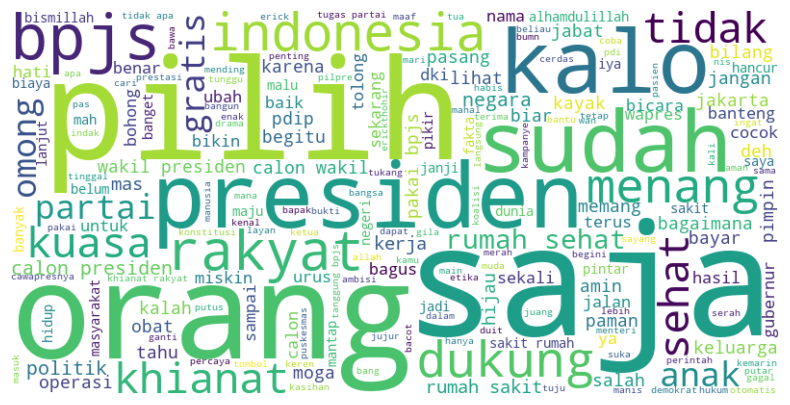

In [20]:
# word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def visualize_word_frequency(text):
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# show word cloud
visualize_word_frequency(' '.join(secondary_dataset['comments'].sum()))

# Modelling

## Synthetic Minority Oversampling Technique (SMOTE)

* this one need research (ivan)
* Smote adalah sebuah tehnik yang digunakan terhadap data yang tidak seimbang

In [21]:
# Smote
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# clean empty row
# Instantiate SMOTE
smote = SMOTE(
    sampling_strategy='minority',
    random_state=42
)
# Assuming 'comments' is the name of the text column
comments = secondary_dataset['comments']
# Assuming 'label' is name of the target column
y = secondary_dataset['label']

# TF-IDF vectorization
vectorizer = TfidfVectorizer()

joined_comments = pd.DataFrame(comments.apply(lambda x: ' '.join(x)))
vectorizer.fit(joined_comments['comments'])
# transform comments
X_tfidf = vectorizer.transform(joined_comments['comments'])

X_smote, y_smote = smote.fit_resample(X_tfidf, y)

In [22]:
# without SMOTE
import pandas as pd
import numpy as np
# plt 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# random forest
from sklearn.ensemble import RandomForestClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import SVC

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Instantiate Multinomial Naive Bayes classifier
classifier = MultinomialNB()
# Logistic Regression
# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
matrix = confusion_matrix(y_test, y_pred)
# Create a dataframe
dataframe = pd.DataFrame(matrix)
print(dataframe)

Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.99      0.80       284
         1.0       0.50      0.02      0.04       142

    accuracy                           0.67       426
   macro avg       0.58      0.51      0.42       426
weighted avg       0.61      0.67      0.55       426

     0  1
0  281  3
1  139  3


In [23]:
# with SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# random forest
from sklearn.ensemble import RandomForestClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# Instantiate Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


# Confusion Matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Transform to dataframe for easier plotting
matrix_df = pd.DataFrame(matrix,
                        index=['negative', 'positive'], 
                        columns=['negative', 'positive'])

# print
print(matrix_df)

Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.56      0.61       272
         1.0       0.66      0.78      0.71       307

    accuracy                           0.67       579
   macro avg       0.67      0.67      0.66       579
weighted avg       0.67      0.67      0.67       579

          negative  positive
negative       151       121
positive        69       238


In [24]:
display(y_test.value_counts())

label
1.0    307
0.0    272
Name: count, dtype: int64

## Grid Search for Hyperparameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV
# import kfold
from sklearn.model_selection import KFold
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# All naive bayes
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
# Logistic Regression
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LogisticRegressionCV
# random forest
from sklearn.ensemble import RandomForestClassifier
# Create k-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning for combination of alpha and fit_prior
model_param_grid = {
    'alpha': [0.01, 0.05,0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 100.0],
    'fit_prior': [True, False],
    # 'class_prior': [None, [0.25, 0.75], [0.5, 0.5], [0.75, 0.25]]
    }

model_grid_search = GridSearchCV(MultinomialNB(), model_param_grid, cv=kfold)
model_grid_search.fit(X_smote, y_smote)
# Print the best parameters and corresponding accuracy
print("\nBest parameters for MultinomialNB:", model_grid_search.best_params_)
print("Best accuracy for MultinomialNB:", model_grid_search.best_score_)

best_alpha = model_grid_search.best_params_['alpha']
best_fit_prior = model_grid_search.best_estimator_.fit_prior


Best parameters for MultinomialNB: {'alpha': 0.01, 'fit_prior': False}
Best accuracy for MultinomialNB: 0.7533678756476684


## K-Fold Cross Validation

* this one need research (abhi)

In [26]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
# all forest algorithm
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

# # Define 10-fold cross-validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# # Instantiate classifier 
classifier = MultinomialNB(alpha=best_alpha, fit_prior=best_fit_prior)
# classifier = SVC(C=hyperparameter_C, gamma=gamma, kernel=kernel)
# classifier = LogisticRegression(C=hyperparameter_C, solver=solver, max_iter=max_iter)
# classifier = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
cv_results = cross_val_score(classifier, X_smote, y_smote, cv=kfold)
# metrics

# # Print the results for each fold
best_fold = 0
best_accuracy = 0

for i, accuracy in enumerate(cv_results):
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_fold = i
        print(f"Fold {i + 1}: Accuracy = {accuracy} <== BEST RESULT")
    else:
        print(f"Fold {i + 1}: Accuracy = {accuracy}")

# from best fold, we will get the best model
# Instantiate classifier
# Print the mean and standard deviation of the cross-validation results
print(f"\nMean Accuracy: {cv_results.mean()}")
print(f"Standard Deviation: {cv_results.std()}")
# # After k-folds, now we will use the best model to predict the data


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Train the model on the entire training set using the best hyperparameters
best_classifier = MultinomialNB(alpha=best_alpha, fit_prior=best_fit_prior)
best_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_classifier.predict(X_test)

# Evaluate the model using a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fold 1: Accuracy = 0.7979274611398963 <== BEST RESULT
Fold 2: Accuracy = 0.7564766839378239
Fold 3: Accuracy = 0.7305699481865285
Fold 4: Accuracy = 0.7409326424870466
Fold 5: Accuracy = 0.7461139896373057
Fold 6: Accuracy = 0.7253886010362695
Fold 7: Accuracy = 0.7357512953367875
Fold 8: Accuracy = 0.7253886010362695
Fold 9: Accuracy = 0.7875647668393783
Fold 10: Accuracy = 0.8290155440414507 <== BEST RESULT

Mean Accuracy: 0.7575129533678757
Standard Deviation: 0.033642866488596726
Confusion Matrix:
[[109  71]
 [ 27 179]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.61      0.69       180
         1.0       0.72      0.87      0.79       206

    accuracy                           0.75       386
   macro avg       0.76      0.74      0.74       386
weighted avg       0.76      0.75      0.74       386



# Analysis

In [27]:
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset

classifier.fit(X_smote, y_smote)

def prediction(data):    
    tokenized = []
    for i in range(0, len(data)):
        # Check if the value is NaN or not a string
        if pd.notna(data[i]) and isinstance(data[i], str):
            tokenized.extend(word_tokenize(data[i]))
    # Transform using the same vectorizer used during training
    text = vectorizer.transform([" ".join(tokenized)]).toarray()
    # return classifier.predict(text)
    return classifier.predict(text)


# test metriks
from sklearn.metrics import accuracy_score, classification_report
# random forest

score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print(f"Accuracy: {score:.2f}")
print("Classification Report:\n", report)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
matrix = confusion_matrix(y_test, y_pred)
# Create a dataframe
dataframe = pd.DataFrame(matrix)
print(dataframe)

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.61      0.69       180
         1.0       0.72      0.87      0.79       206

    accuracy                           0.75       386
   macro avg       0.76      0.74      0.74       386
weighted avg       0.76      0.75      0.74       386

     0    1
0  109   71
1   27  179


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze(data_to_analyze):
    pos = 0
    neg = 0
    label = []
    predictionLabel = []

    data_to_analyze = data_to_analyze.dropna()
    data_to_analyze = remove_punct(data_to_analyze)
    # norm
    # print("Normalizing...")
    data_to_analyze['comments'] = data_to_analyze['comments'].apply(word_tokenize)
    data_to_analyze['comments'] = data_to_analyze['comments'].apply(replace_slang_word, slang_word=indo_slang_word)
    data_to_analyze['comments'] = data_to_analyze['comments'].apply(lemma_indo)
    data_to_analyze['comments'] = data_to_analyze['comments'].apply(lambda x: ' '.join(x))
    data_to_analyze['comments'] = data_to_analyze['comments'].astype(str)
    # print("Done...")

    for i in range(0, len(data_to_analyze)):
        try:
            text = [data_to_analyze['comments'][i]]
            pred = prediction(text) 
            predictionLabel.append(pred[0])
            # print("Comment:", text)
            # print("Prediction:", pred)
            if pred == 1:
                pos += 1
            else:
                neg += 1
            label.append(pred[0])
        except:
            continue
    # # data_to_analyze['label'] = label
    print("Positive:", pos, " (",round(pos/len(data_to_analyze)*100),"%)") 
    # bulatkan ke 2 angka di belakang koma
    
    print("Negative:", neg, " (",round(neg/len(data_to_analyze)*100),"%)")
    labels = 'Positive', 'Negative'
    sizes = [pos, neg]
    explode = (0, 0.1)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=False, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    return pos, neg

## Anies

Anies Sebelum Deklarasi Calon Presiden


Positive: 42  ( 11 %)
Negative: 325  ( 88 %)


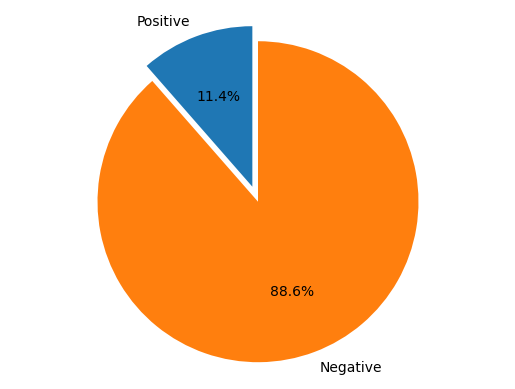



Anies Sesudah Deklarasi Calon Presiden
Positive: 47  ( 21 %)
Negative: 172  ( 78 %)


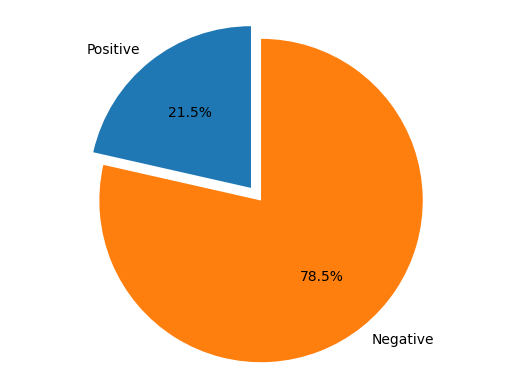

label
0.0    319
1.0     51
Name: count, dtype: int64

label
0    176
1     45
Name: count, dtype: int64

In [29]:
# # [Anies]

print("Anies Sebelum Deklarasi Calon Presiden")
anies_pos_before, anies_neg_before = analyze(detik_anies_before)
print("\n")
print("Anies Sesudah Deklarasi Calon Presiden")
anies_pos_after, anies_neg_after = analyze(detik_anies_after)

# detik_anies_after count all label
display(detik_anies_before['label'].value_counts())
display(detik_anies_after['label'].value_counts())

## Prabowo

Prabowo Sebelum Deklarasi Cawapres
Positive: 108  ( 48 %)
Negative: 115  ( 51 %)


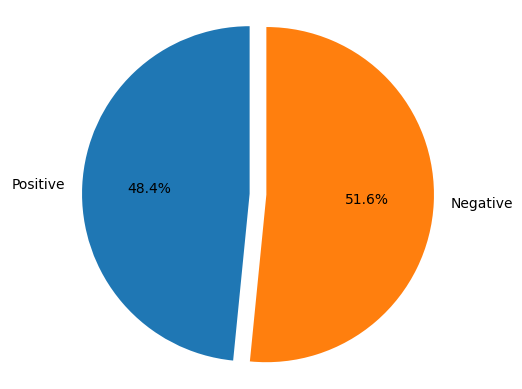



Prabowo Sesudah Deklarasi Cawapres
Positive: 216  ( 35 %)
Negative: 390  ( 64 %)


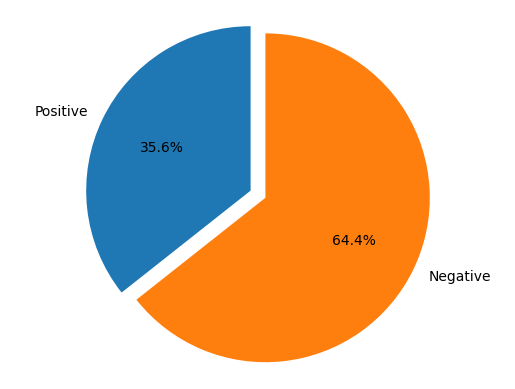

label
0.0    117
1.0    107
Name: count, dtype: int64

label
0.0    420
1.0    189
Name: count, dtype: int64

In [30]:
# # [Prabowo]

print("Prabowo Sebelum Deklarasi Cawapres")
prabowo_pos_before, prabowo_neg_before = analyze(detik_prabowo_before)
print("\n")
print("Prabowo Sesudah Deklarasi Cawapres")
prabowo_pos_after, prabowo_neg_after =  analyze(detik_prabowo_after)

# detik_anies_after count all label
display(detik_prabowo_before['label'].value_counts())
display(detik_prabowo_after['label'].value_counts())

## Ganjar

Ganjar Sebelum Deklarasi Calon Presiden


Positive: 43  ( 37 %)
Negative: 73  ( 63 %)


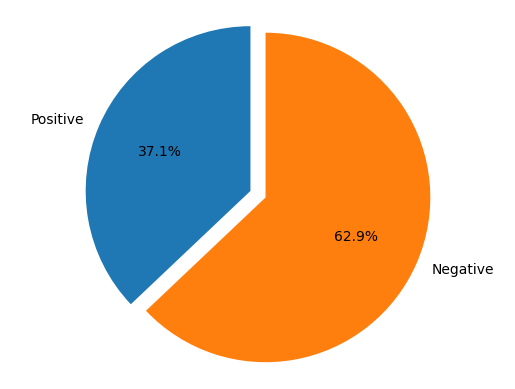



Ganjar Sesudah Deklarasi Calon Presiden
Positive: 67  ( 74 %)
Negative: 23  ( 26 %)


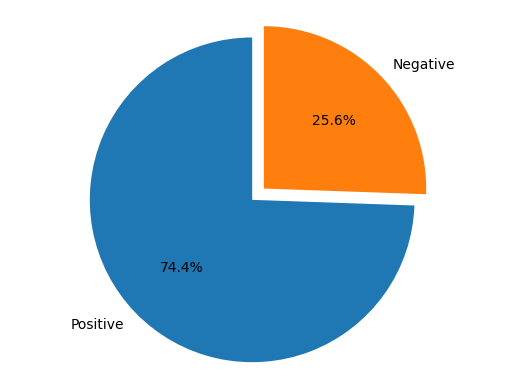

label
0    72
1    44
Name: count, dtype: int64

label
1    82
0     8
Name: count, dtype: int64

In [31]:
# # [Ganjar]

print("Ganjar Sebelum Deklarasi Calon Presiden")
ganjar_pos_before, ganjar_neg_before = analyze(detik_ganjar_before)
print("\n")
print("Ganjar Sesudah Deklarasi Calon Presiden")
ganjar_pos_after, ganjar_neg_after = analyze(detik_ganjar_after)

# detik_anies_after count all label
display(detik_ganjar_before['label'].value_counts())
display(detik_ganjar_after['label'].value_counts())

## Visualization

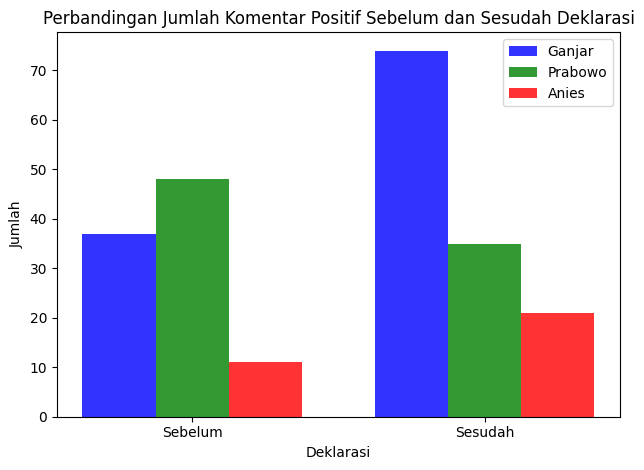

In [32]:
# compare all positve values.

# normalize data to 100%
# ganjar
ganjar_pos_before = round(ganjar_pos_before/len(detik_ganjar_before)*100)
ganjar_pos_after = round(ganjar_pos_after/len(detik_ganjar_after)*100)
# prabowo
prabowo_pos_before = round(prabowo_pos_before/len(detik_prabowo_before)*100)
prabowo_pos_after = round(prabowo_pos_after/len(detik_prabowo_after)*100)
# anies
anies_pos_before = round(anies_pos_before/len(detik_anies_before)*100)
anies_pos_after = round(anies_pos_after/len(detik_anies_after)*100)


ganjar = [ganjar_pos_before, ganjar_pos_after]
prabowo = [prabowo_pos_before, prabowo_pos_after]
anies = [anies_pos_before, anies_pos_after]

# data to plot
n_groups = 2
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, ganjar, bar_width,
alpha=opacity,
color='b',
label='Ganjar')

rects2 = plt.bar(index + bar_width, prabowo, bar_width,
alpha=opacity,
color='g',
label='Prabowo')

rects3 = plt.bar(index + bar_width + bar_width, anies, bar_width,
alpha=opacity,
color='r',
label='Anies')

plt.xlabel('Deklarasi')
plt.ylabel('Jumlah')
plt.title('Perbandingan Jumlah Komentar Positif Sebelum dan Sesudah Deklarasi')
plt.xticks(index + bar_width, ('Sebelum', 'Sesudah'))
plt.legend()

plt.tight_layout()
plt.show()